In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Customer-churn.csv')   #import data set

In [3]:
df1=df.copy()

In [4]:
df2=df.copy()

In [5]:
df3=df.copy()

In [6]:
df.head()                            #first five rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
1869/(5174+1869)

0.2653698707936959

C:\Users\ruhul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


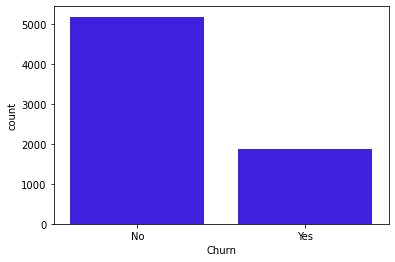

In [11]:
sns.countplot(df['Churn'],color ='#2B00FF')
plt.show()

In [12]:
df=df.dropna()

In [13]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(7032, 21)

In [15]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015205,0.219556,0.102001
tenure,0.015205,1.000000,0.246852,0.825874
MonthlyCharges,0.219556,0.246852,1.000000,0.651065
TotalCharges,0.102001,0.825874,0.651065,1.000000


<AxesSubplot:>

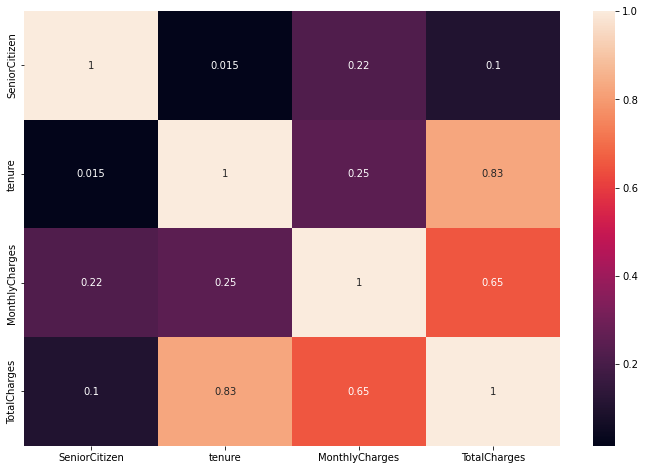

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# Basic Visualization using Seaborn Library

<AxesSubplot:xlabel='count', ylabel='gender'>

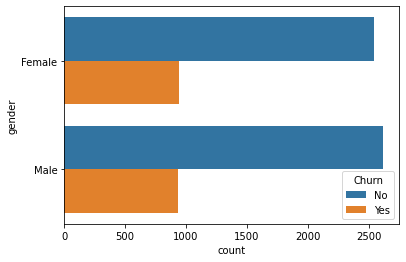

In [17]:
sns.countplot(y='gender',hue='Churn',data=df)

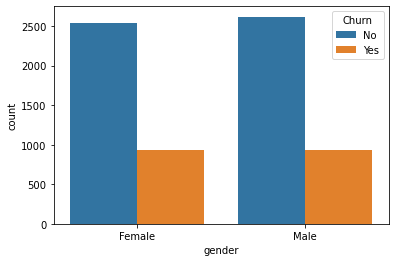

In [18]:
sns.countplot(x='gender',hue='Churn',data=df)
plt.show()

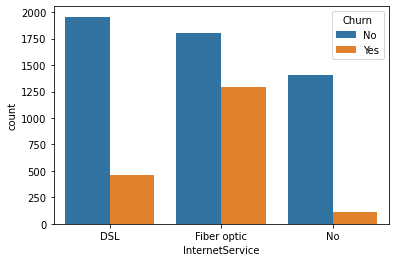

In [19]:
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.show()

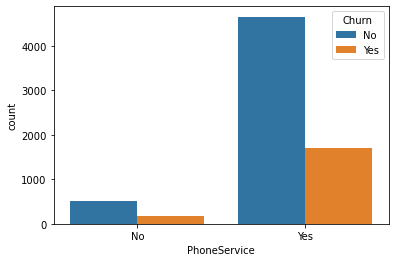

In [20]:
sns.countplot(x='PhoneService',hue='Churn',data=df)
plt.show()

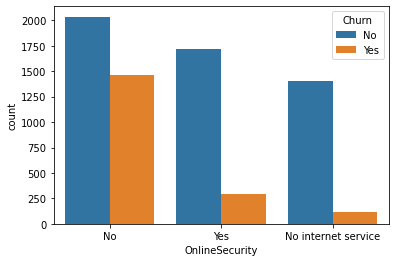

In [21]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)
plt.show()

In [22]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

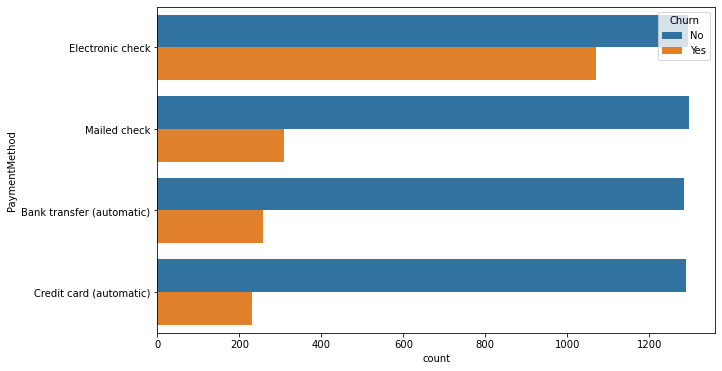

In [23]:
plt.subplots(figsize=(10,6))
sns.countplot(y='PaymentMethod',hue='Churn',data=df)
plt.show()

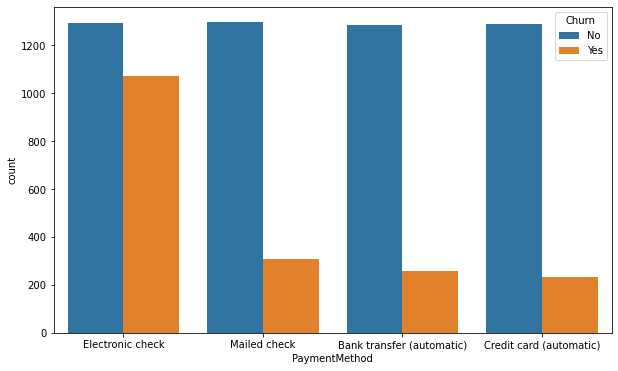

In [24]:
plt.subplots(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.show()

# Preprocess the dataset

In [25]:
#Drop Customer id
df=df.drop('customerID',axis=1)

In [26]:
df.shape

(7032, 20)

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Encode the data set

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label=LabelEncoder()   #creating an object

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
from pandas.core.dtypes.common import is_numeric_dtype

In [32]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Seperate x,y

In [34]:
x=df.drop('Churn',axis=1)  #separate dependent and independent variable
y=df['Churn']               # churn is class

In [35]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [36]:
x.shape

(7032, 19)

In [37]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [38]:
y.shape

(7032,)

# Imbalanced Data Handling

In [39]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [40]:
not_churned=(5163/(5163+1869))*100
churned=(1869/(5163+1869))*100

In [41]:
print('Not churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not churned 73.42150170648463 percent of total people
Churned 26.578498293515356 percent of total people


# Synthetic Minority Oversampling Technique (SMOTETomek)

In [42]:
!pip install imblearn

In [43]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [44]:
from imblearn.combine import SMOTETomek 

In [45]:
sm=SMOTETomek()     # creating an object

In [46]:
y.value_counts()    #before sampling

0    5163
1    1869
Name: Churn, dtype: int64

In [47]:
X,Y=sm.fit_resample(x,y)

In [48]:
X.shape

(9602, 19)

In [49]:
Y.shape

(9602,)

In [50]:
Y.value_counts()

0    4801
1    4801
Name: Churn, dtype: int64

In [51]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [52]:
X.shape

(9602, 19)

# Near Miss for Under_Sampling

In [53]:
from imblearn.under_sampling import NearMiss

In [54]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html

In [55]:
NearMiss_obj=NearMiss()
new_x,new_y=NearMiss_obj.fit_resample(x,y)

In [56]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,69.90
1,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,20.90
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,20.20
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,20.20
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,20.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,727.80
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,75.75
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,6886.25


In [57]:
new_x.shape

(3738, 19)

In [58]:
3738/2

1869.0

In [59]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int32

In [60]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

# Over Sampling

In [61]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [63]:
from imblearn.over_sampling import RandomOverSampler

In [64]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

In [65]:
over=RandomOverSampler(random_state=100)

In [66]:
x_new,y_new=over.fit_resample(x,y)

In [67]:
x_new.shape

(10326, 19)

In [68]:
y_new.shape

(10326,)

In [69]:
y_new.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

# Cross Validation
Hold Out Cross Validation

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,train_size=.75,random_state=42)

In [72]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2724,0,0,0,0,2,1,2,1,0,0,0,0,0,2,0,1,2,85.70,169.80
5244,1,1,0,0,35,1,0,0,0,0,2,2,2,2,1,1,2,73.00,2471.25
8403,0,0,1,1,13,1,0,1,0,0,0,0,2,2,0,0,2,88.35,1222.80
9220,1,0,1,0,14,1,2,1,0,0,0,0,2,0,0,1,2,86.10,1235.55
9261,1,0,0,0,10,1,2,1,0,2,0,0,0,0,0,1,0,80.70,788.80


In [73]:
a80,b20=train_test_split(df,train_size=.80,random_state=42)

In [74]:
a80.to_csv('total 80.csv')

In [75]:
df6=pd.read_csv('total 80.csv')

In [76]:
df6.shape

(5625, 21)

In [77]:
rows,col=df.shape
rows2,cols2=df6.shape

In [78]:
rows

7032

In [79]:
rows2

5625

In [80]:
7032*.80

5625.6

In [81]:
train,test=train_test_split(df,train_size=.75,random_state=42)

In [82]:
train.to_csv('train_data.csv')

In [83]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4139,1,0,1,0,35,1,2,1,0,0,0,0,0,0,0,1,2,75.20,2576.20
1692,0,0,1,1,63,1,0,0,2,2,2,2,2,0,2,0,1,75.55,4707.85
2692,0,0,1,0,71,1,2,0,2,2,2,2,2,2,2,0,0,87.95,6365.35
7704,1,0,0,1,1,1,0,0,2,0,0,0,0,0,0,0,3,50.60,50.60
321,0,0,1,1,72,0,1,0,0,2,2,2,2,2,2,1,2,60.00,4264.00


In [84]:
xtest.shape

(2582, 19)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
clf=DecisionTreeClassifier()

In [87]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [88]:
clf.score(xtest,ytest)

0.8516653756777691

# Without Sampling

In [89]:
x.shape

(7032, 19)

In [90]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,train_size=.75,random_state=42)

In [91]:
clf.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [92]:
clf.score(xtest1,ytest1)

0.7121729237770194

# XGBoost Classifier

In [93]:
!pip install xgboost

In [94]:
import xgboost
from xgboost import XGBClassifier

In [95]:
xgb=XGBClassifier()

In [96]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [97]:
xgb.score(xtest,ytest)   #After sampling

0.8419829589465531

# Before Sampling

In [98]:
xgb.fit(xtrain1,ytrain1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [99]:
xgb.score(xtest1,ytest1)

0.7781569965870307

# Ada Boost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
ada=AdaBoostClassifier()

In [102]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [103]:
ada.score(xtest,ytest)

0.7645236250968241

# Before Sampling

In [104]:
ada.fit(xtrain1,ytrain1)

AdaBoostClassifier()

In [105]:
ada.score(xtest1,ytest1)

0.7923777019340159

# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
ran=RandomForestClassifier()

In [108]:
ran.fit(xtrain,ytrain)

RandomForestClassifier()

In [109]:
ran.score(xtest,ytest)

0.8814872192099148

# Before Sampling

In [110]:
ran.fit(xtrain1,ytrain1)

RandomForestClassifier()

In [111]:
ran.score(xtest1,ytest1)

0.7810011376564278

# Cross Validation
K Fold Cross Validation

In [112]:
from sklearn.model_selection import KFold,cross_val_score,cross_validate

In [113]:
kfold=KFold(n_splits=4)   #each fold contain 25% data

In [114]:
result=cross_val_score(xgb,x_new,y_new,cv=kfold)

In [115]:
result

array([0.79744384, 0.79163439, 0.86478109, 0.87020535])

In [116]:
result.mean()

0.8310161683229439

In [117]:
result.max()

0.8702053467648199

In [118]:
result.min()

0.7916343919442292

# Stratified K fold cross validation

In [119]:
from sklearn.model_selection import StratifiedKFold

In [120]:
st=StratifiedKFold(n_splits=4)

In [121]:
score2=cross_val_score(xgb,x_new,y_new,cv=st)

In [122]:
score2

array([0.84972889, 0.85670023, 0.86168152, 0.87098024])

In [123]:
score2.mean()

0.8597727209294159

In [124]:
score2.max()

0.8709802402169702

In [125]:
score2.min()

0.8497288923315259

# Leave One out cross validation

In [126]:
from sklearn.model_selection import LeaveOneOut

In [127]:
le=LeaveOneOut()

In [128]:
result3 = cross_val_score(ada,x,y,cv=le)

In [129]:
result3

array([0., 1., 0., ..., 1., 1., 1.])

In [130]:
result3.mean()

0.8040386803185438

In [131]:
result3.max()

1.0

In [132]:
result3.min()

0.0